**IMPORTING LIBRARIES**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model


**PREPARING DATA**

In [14]:
iris=sklearn.datasets.load_iris()
x=iris.data[:,:2]
y=iris.target
no_of_samples=100
X=x[:100]
Y=y[:100]


In [18]:
random_instances=np.random.permutation(no_of_samples)


no_training_samples=int(0.7*no_of_samples)
x_train=X[random_instances[:no_training_samples]]
y_train=Y[random_instances[:no_training_samples]]


no_validation_samples=int(0.15*no_of_samples)
x_validation=X[random_instances[no_training_samples:no_training_samples+no_validation_samples]]
y_validation=Y[random_instances[no_training_samples:no_training_samples+no_validation_samples]]


no_test_samples=int(0.15*no_of_samples)
x_test=X[random_instances[-no_test_samples]]
y_test=Y[random_instances[-no_test_samples:]]




In [42]:
x_class0=np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
y_class0=np.zeros(x_class0.shape[0])
x_class1=np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
y_class1=np.ones(x_class1.shape[0])

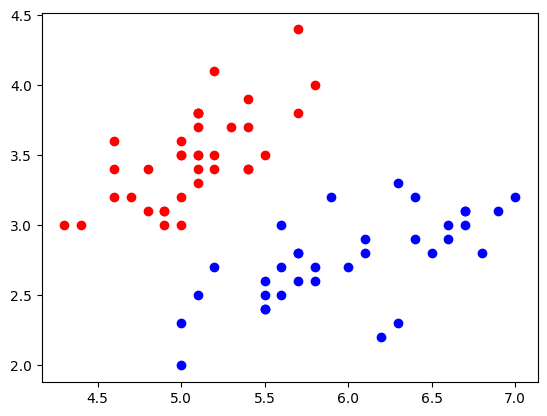

In [45]:
plt.scatter(x_class0[:,0],x_class0[:,1],color='red')
plt.scatter(x_class1[:,0],x_class1[:,1],color='blue')
plt.show()

**TESTING TARGETS**

<ipython-input-57-cc12c0b5bbc0>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_class0[:, 0], x_class0[:, 1], edgecolors='black', cmap='viridis')
<ipython-input-57-cc12c0b5bbc0>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_class1[:, 0], x_class1[:, 1], edgecolors='white', cmap='coolwarm')


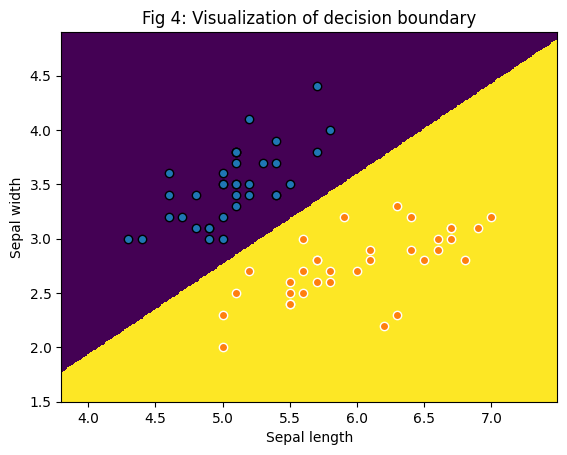

In [57]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((x_class0,x_class1),axis=0)
full_Y = np.concatenate((y_class0,y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .01  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

# Plot also the training points
plt.scatter(x_class0[:, 0], x_class0[:, 1], edgecolors='black', cmap='viridis')
plt.scatter(x_class1[:, 0], x_class1[:, 1], edgecolors='white', cmap='coolwarm')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()